In [9]:
import matplotlib.pyplot as plt 
import cbmpy
from dcFBA.Models import CommunityModel

In [13]:
iAF1260 = cbmpy.loadModel("../../input/iAF1260.xml")


cm = CommunityModel([iAF1260, iAF1260.clone()], ["R_BIOMASS_Ec_iAF1260_core_59p81M", "R_BIOMASS_Ec_iAF1260_core_59p81M"], ["EC1", "EC2"], )

Attempting to load SBML file: ../../input/iAF1260.xml
SBML Level 3 FBC version 2 model detected, loading with cbmpy.readSBML3FBC()
FBC version: 2
M.getNumReactions: 2382
M.getNumSpecies: 1668
FBC.getNumObjectives: 1
FBC.getNumParameters: 8
FBC.getNumGeneProducts: 1261
Zero dimension compartment detected: c
Zero dimension compartment detected: p
Zero dimension compartment detected: e
FluxBounds process1: 0.03
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.102

SBML3 load time: 2.907

getState1
Model clone time: 2.025385856628418
Deleting reagent: R_2AGPG161tipp_M_2agpg161_c
Deleting reagent: R_2AGPGAT161_M_2agpg161_c
Deleting reagent: R_LPLIPAL2G161_M_2agpg161_c
Deleting reagent: R_LPLIPAL2ATG161_M_2agpg161_c
Deleting reagent: R_2AGPG161tipp_M_2agpg161_p
Deleting reagent: R_PLIPA1G161pp_M_2agpg161_p
Deleting reagent: R_2AGPG180tipp_M_2agpg180_c
Deleting reagent: R_2AGPGAT180_M_2agpg180_c
Deleting reagent: R_LPLIPAL2G180_M_2agpg180_c
Deleting reagent: R_LPLIPAL2

In [37]:
E = len(cm.getExchangeReactionIds())
R = (len(cm.getReactionIds()) - E) 

Me = 0
for species in cm.species:
    if species.getCompartmentId() =="e":
        Me+=1

K = 2

M = len(cm.getSpeciesIds()) + K + 1


In [38]:
def Eep():
    return 2* E + 2*K+1

def Rep(n):
    return n * R + (n-1) * (Me + K + 1) + Eep() 

def Mep(n):
    return n*M  + K + 1


def RAM(n):
    return (8 * Mep(n) * Rep(n)) / (1024**3)

992.5377039536834


<function matplotlib.pyplot.show(close=None, block=None)>

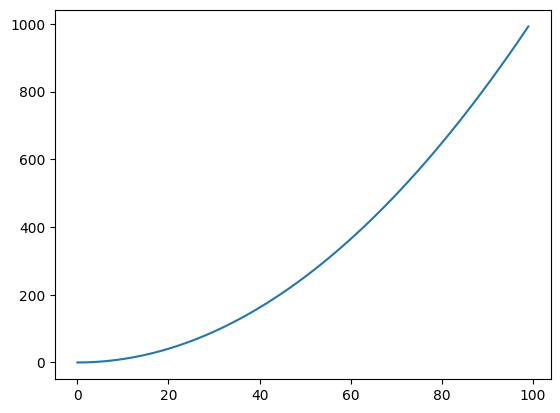

In [39]:
n = 100
y =  [RAM(i) for i in range(0,n)]
print(y[-1])
plt.plot(range(0,n), y)
plt.show